In [1]:
import numpy as np
import joblib
import os
import pandas as pd

# 使用网格搜索方法来进行参数选择
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder

from collections import Counter
# 使用StratifiedShuffleSplit类进行分层抽样
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE, KMeansSMOTE
from data_process.light_curve import ASASLightCurve

# 使用StratifiedShuffleSplit类进行分层抽样
from sklearn.model_selection import train_test_split

In [3]:

eclipsing_binary_list = np.load("../dataset/light_curve_instance/eclipsing_binary/lc_eclipsing_binary.npy",
                                allow_pickle=True)
len(eclipsing_binary_list)

KeyboardInterrupt: 

In [ ]:
print(eclipsing_binary_list[0].meta)

In [ ]:
from tqdm import tqdm

full_lc_pd = pd.DataFrame(columns=eclipsing_binary_list[0].meta.keys())
for lc in tqdm(eclipsing_binary_list):
    full_lc_pd = full_lc_pd.append(lc.meta, ignore_index=True)
full_lc_pd

In [ ]:
full_lc_pd.to_csv("../dataset/light_curve_dataframe/eclipsing_binary/lc_eclipsing_binary.csv", index=False)

In [3]:
full_lc_pd = pd.read_csv("../dataset/light_curve_dataframe/eclipsing_binary/lc_eclipsing_binary.csv")

In [4]:
full_lc_pd.columns.tolist()

['source_id',
 'raj2000',
 'dej2000',
 'l',
 'b',
 'mean_vmag',
 'amplitude',
 'period',
 'variable_type',
 'class_probability',
 'lksl_statistic',
 'rfr_score',
 'epoch_hjd',
 'gdr2_id',
 'phot_g_mean_mag',
 'e_phot_g_mean_mag',
 'phot_bp_mean_mag',
 'e_phot_bp_mean_mag',
 'phot_rp_mean_mag',
 'e_phot_rp_mean_mag',
 'bp_rp',
 'parallax',
 'parallax_error',
 'parallax_over_error',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'vt',
 'dist',
 'j_mag',
 'e_j_mag',
 'h_mag',
 'e_h_mag',
 'k_mag',
 'e_k_mag',
 'w1_mag',
 'e_w1_mag',
 'w2_mag',
 'e_w2_mag',
 'w3_mag',
 'e_w3_mag',
 'w4_mag',
 'e_w4_mag',
 'j_k',
 'w1_w2',
 'w3_w4',
 'apass_dr9_id',
 'apass_vmag',
 'e_apass_vmag',
 'apass_bmag',
 'e_apass_bmag',
 'apass_gpmag',
 'e_apass_gpmag',
 'apass_rpmag',
 'e_apass_rpmag',
 'apass_ipmag',
 'e_apass_ipmag',
 'b_v',
 'e_b_v',
 'vector_x',
 'vector_y',
 'vector_z',
 'periodic',
 'created_at',
 'updated_at',
 'nuvmag',
 'e_nuvmag',
 'pm',
 'ruwe',
 'main_type',
 'mean',
 'median',
 's

In [45]:
# full_lc_pd_ell = full_lc_pd[full_lc_pd["variable_type"]=="ELL"]
# full_lc_pd = full_lc_pd[full_lc_pd["variable_type"]!="ELL"][:10000]
# full_lc_pd = full_lc_pd.append(full_lc_pd_ell)

In [15]:

# features_drop_unlabel = full_lc_pd[useful_feature_cepheids1]
# full_lc_pd = full_lc_pd[(full_lc_pd["class_probability"] >= 0.20) | (full_lc_pd["class_probability"] is None)]
sub_class = full_lc_pd["variable_type"]
features_drop_unlabel = full_lc_pd.drop(
    labels=["source_id", "class_probability", "variable_type", "created_at", "main_type", "updated_at",
            "lksl_statistic", "rfr_score", "epoch_hjd", "e_b_v", "vector_x", "vector_y",
            "vector_z", "periodic", "mean", "raj2000", "dej2000", "b", "l"], axis=1)
features_drop_unlabel = features_drop_unlabel.dropna(axis=1)
features_drop_unlabel

,mean_vmag,amplitude,period,median,std,skewness,kurtosis,shapiro_w,IQR,p2p,...,b54,depth_ratio,slope_diff_ratio,similarity,phase_eta,slope_per10,slope_per90,slope_per20,slope_per80,phase_cusum
0,14.25,0.43,0.369614,14.202,0.142713,0.500412,-1.145314,0.904199,0.26200,0.487,...,0.016009,0.000000,1.107516,0.987844,0.069590,-0.107168,0.105149,-0.044136,0.048258,0.272312
1,12.40,0.21,1.992654,12.412,0.070507,-0.396765,-1.408323,0.877730,0.12950,0.232,...,0.725250,0.012931,1.211936,0.966092,0.539229,-1.484450,1.349271,-0.698874,0.537312,0.197429
2,12.40,0.21,1.992654,12.412,0.059859,0.434794,-0.129593,0.966451,0.08200,0.263,...,-0.414279,0.003802,2.353940,0.975938,0.887772,-0.592608,0.904362,-0.251150,0.370921,0.216416
3,13.18,0.36,0.412779,13.140,0.113869,0.724848,-0.915747,0.864701,0.19300,0.368,...,-0.068455,0.021739,1.109102,0.983095,0.046302,-0.298712,0.267680,-0.161734,0.096642,0.250773
4,13.18,0.36,0.412779,13.140,0.116021,0.524846,-1.084964,0.902068,0.20800,0.396,...,-0.010638,0.002525,1.348041,0.982628,0.089193,-0.203587,0.226081,-0.098112,0.109488,0.230508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127334,13.67,0.13,0.468586,13.663,0.038960,0.217261,-0.895774,0.970155,0.06075,0.163,...,0.659398,0.042945,1.085785,0.956323,0.715128,-0.353347,0.371974,-0.169320,0.148949,0.211349
127335,13.44,0.50,5.021012,13.413,0.084740,4.134982,19.600252,0.471157,0.02050,0.597,...,1.192759,0.556114,6.169001,0.950807,0.844292,-11.960270,10.664640,-4.298160,3.294531,0.161760
127336,13.44,0.50,5.021012,13.413,0.099210,3.254838,10.122744,0.490252,0.02125,0.551,...,0.591638,0.284936,1.264316,0.939473,0.293483,-4.076498,3.908200,-1.559490,1.362397,0.165524
127337,14.16,0.17,0.402175,14.165,0.052464,-0.011596,-1.192687,0.957627,0.08950,0.193,...,-2.461598,0.010363,1.115968,0.971849,0.374355,-0.173481,0.144664,-0.080845,0.057095,0.234512


In [16]:

new_features = ['period', 'r42', 'r21', 'phase_eta', 'b2', 'kurtosis', 'skewness', 'amplitude', 'r32', 'similarity',
                'phase_cusum', 'hl_amp_ratio', 'b1', 'mean_vmag', 'b42', 'a54', 'a53', 'b21', 'slope_diff_ratio', 'r51',
                'stetson_k', 'phi43', 'median', 'depth_ratio', 'Mm_ratio', 'a2', 'b32', 'a41', 'r31', 'a32', 'a31',
                'r41', 'a43', 'a52', 'a42', 'a5', 'a51', 'slope_per80', 'r52', 'r54', 'p2p', 'h_1', 'phi42', 'b31',
                'phi32', 'b4', 'a21', 'b54', 'b3', 'a4', 'MAD', 'r43', 'phi54', 'phi21', 'slope_per10', 'a1', 'b43',
                'shapiro_w', 'slope_per90', 'phi53', 'phi52', 'r53', 'b53', 'b52', 'slope_per20', 'IQR', 'a3', 'phi51',
                'std', 'b5', 'b51', 'phi41', 'phi31', 'b41', 'f_phase']
fnum = 25
smote = "None"
features_drop_unlabel = features_drop_unlabel[new_features[:fnum]]

In [17]:
features_drop_unlabel = features_drop_unlabel.drop(labels=["similarity"],axis=1)
# features_drop_unlabel = features_drop_unlabel.drop(labels=["similarity","Mm_ratio","slope_diff_ratio","depth_ratio"],axis=1)
# features_drop_unlabel = features_drop_unlabel.drop(labels=["similarity","Mm_ratio","slope_diff_ratio","depth_ratio"],axis=1)
# features_drop_unlabel = features_drop_unlabel.drop(labels=["similarity","Mm_ratio","slope_diff_ratio","depth_ratio"],axis=1)

In [18]:
label_encoder = LabelEncoder()
sub_class = label_encoder.fit_transform(sub_class)
sub_class = sub_class.astype(np.int32)

In [19]:
np.random.seed(1)
X_train, X_test, y_train, y_test = train_test_split(features_drop_unlabel, sub_class, test_size=0.2, shuffle=True,random_state=0)

print(sorted(Counter(y_train).items()))

[(0, 31402), (1, 16018), (2, 72), (3, 54379)]


In [20]:
import lightgbm as lgb

param_grid = [
    {'n_estimators': (10,400)},
]

clf = lgb.LGBMClassifier(learning_rate=0.038375, random_state=0)
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring="accuracy", return_train_score=True, verbose=10)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.best_score_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5; 1/2] START n_estimators=10.............................................
[CV 1/5; 1/2] END n_estimators=10;, score=(train=0.912, test=0.908) total time=   0.1s
[CV 2/5; 1/2] START n_estimators=10.............................................
[CV 2/5; 1/2] END n_estimators=10;, score=(train=0.910, test=0.908) total time=   0.1s
[CV 3/5; 1/2] START n_estimators=10.............................................
[CV 3/5; 1/2] END n_estimators=10;, score=(train=0.911, test=0.908) total time=   0.1s
[CV 4/5; 1/2] START n_estimators=10.............................................
[CV 4/5; 1/2] END n_estimators=10;, score=(train=0.909, test=0.905) total time=   0.1s
[CV 5/5; 1/2] START n_estimators=10.............................................
[CV 5/5; 1/2] END n_estimators=10;, score=(train=0.911, test=0.909) total time=   0.1s
[CV 1/5; 2/2] START n_estimators=400............................................
[CV 1/5; 2/2] END n

In [21]:
grid_search.score(X_test, y_test)

0.9434584576723731

In [411]:
cvres = grid_search.cv_results_
if not os.path.exists("../output/eclipsing_binary"):
    os.makedirs("../output/eclipsing_binary")

with open(f"../output/eclipsing_binary/lgbm_eclipsing_binary_top{fnum}_sm{smote}.txt", "w") as f:
    for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
        f.write(str(mean_score) + "," + str(params["learning_rate"]) + "," + str(params["n_estimators"]) + "\n")

In [342]:
# 计算每种特征对分类结果的影响
feature_name = features_drop_unlabel.columns
feature_importances = grid_search.best_estimator_.feature_importances_

# if not os.path.exists("../output/eclipsing_binary"):
#     os.makedirs("../output/eclipsing_binary")
# with open(f"../output/eclipsing_binary/lgbm_eclipsing_binary_top{fnum}_{smote}_feature_importance.txt", "w") as f:
#     for i in range(len(feature_importances)):
#         f.write(str(feature_importances[i]) + " " + str(feature_name[i]) + "\n")

['period', 'r42', 'b2', 'amplitude', 'phase_eta', 'r21', 'r32', 'phi43', 'similarity', 'skewness', 'r51', 'b1', 'b42', 'mean_vmag', 'phase_cusum', 'kurtosis', 'b21', 'hl_amp_ratio', 'a53', 'stetson_k', 'a54', 'slope_diff_ratio', 'depth_ratio', 'Mm_ratio', 'median']


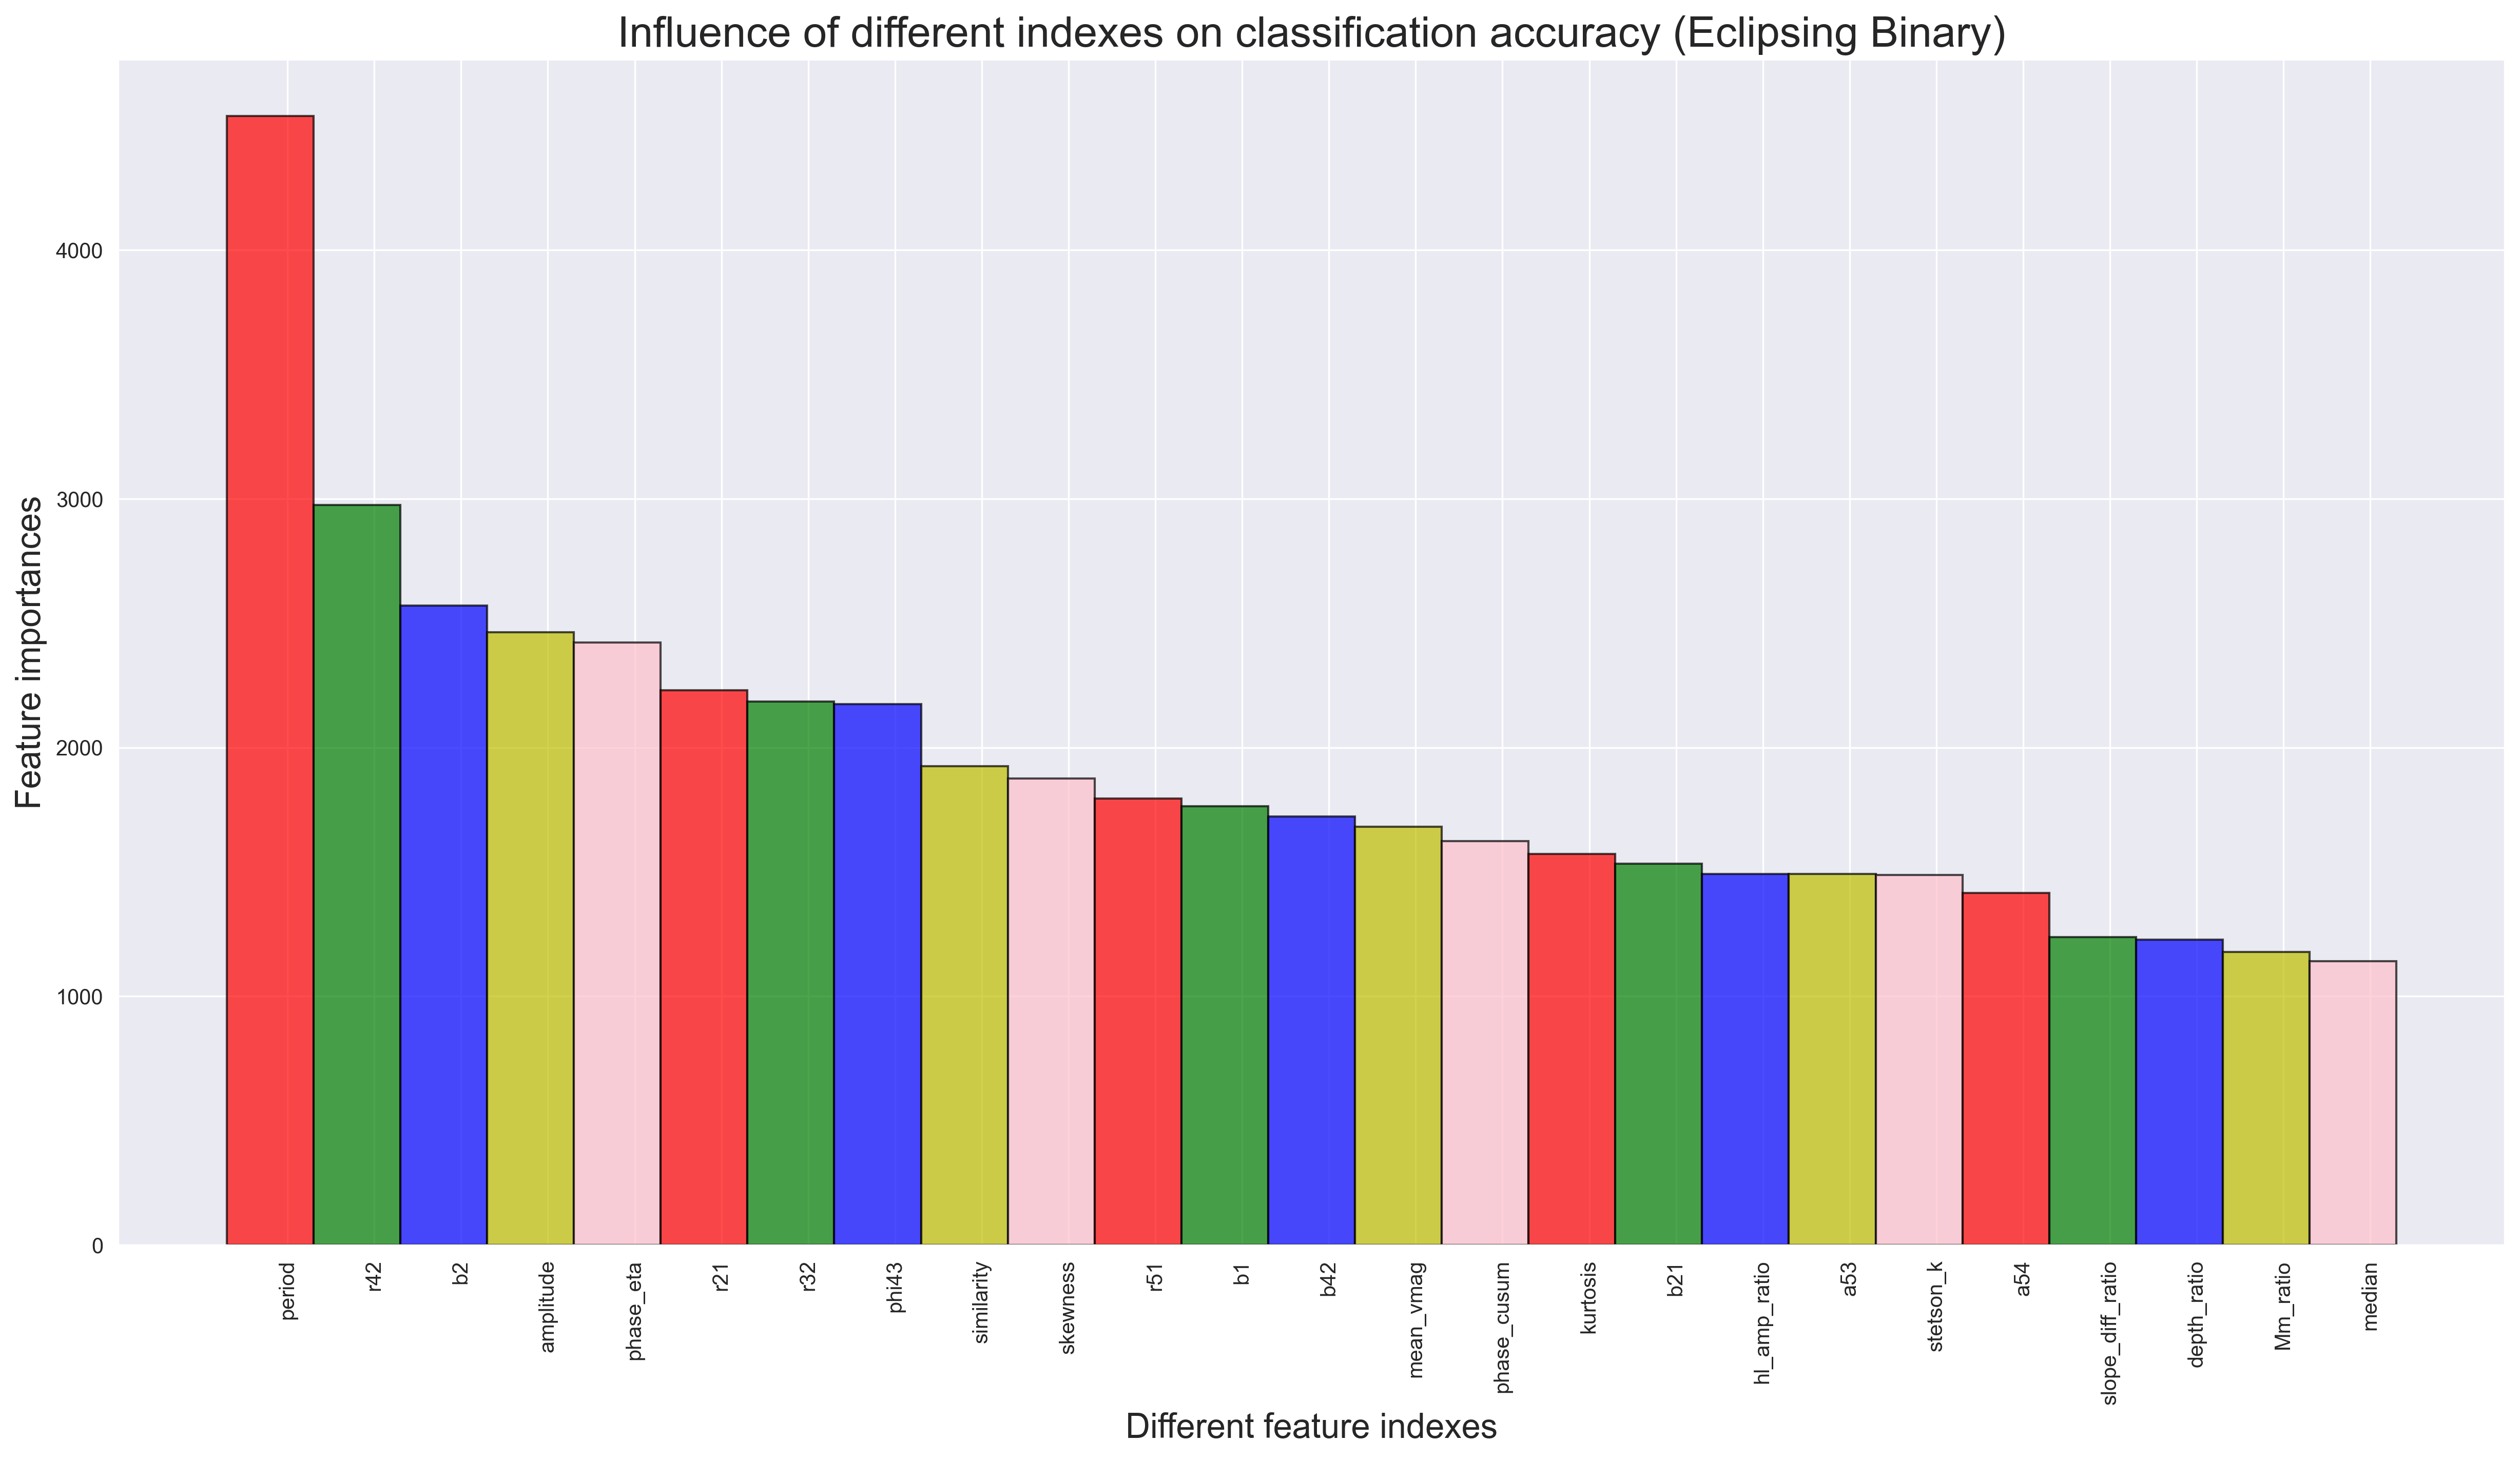

FileNotFoundError: [Errno 2] No such file or directory: './output/feature_important/random_forest_cepheids_importance_0.9413375931431915.png'

<Figure size 640x480 with 0 Axes>

In [343]:
import matplotlib.pyplot as plt

importances = sorted(zip(feature_importances, feature_name), reverse=True)
feature_im = []
feature_n = []

for i in importances:
    feature_im.append(i[0])
    feature_n.append(i[1])

print(feature_n)
plt.figure(figsize=(20, 10), dpi=300)
indexes = np.arange(len(feature_im))
plt.title("Influence of different indexes on classification accuracy (Eclipsing Binary)", fontsize=20)
plt.xlabel("Different feature indexes", fontsize=16)
plt.ylabel("Feature importances", fontsize=16)
plt.bar(2 * indexes, feature_im, 2, edgecolor="black", alpha=0.7, color=['r', 'g', 'b', 'y', 'pink'])
plt.xticks(2 * indexes + 2 * 0.2, feature_n, rotation=90)
plt.show()
plt.savefig(f"./output/feature_important/random_forest_cepheids_importance_{grid_search.best_score_}.png")

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

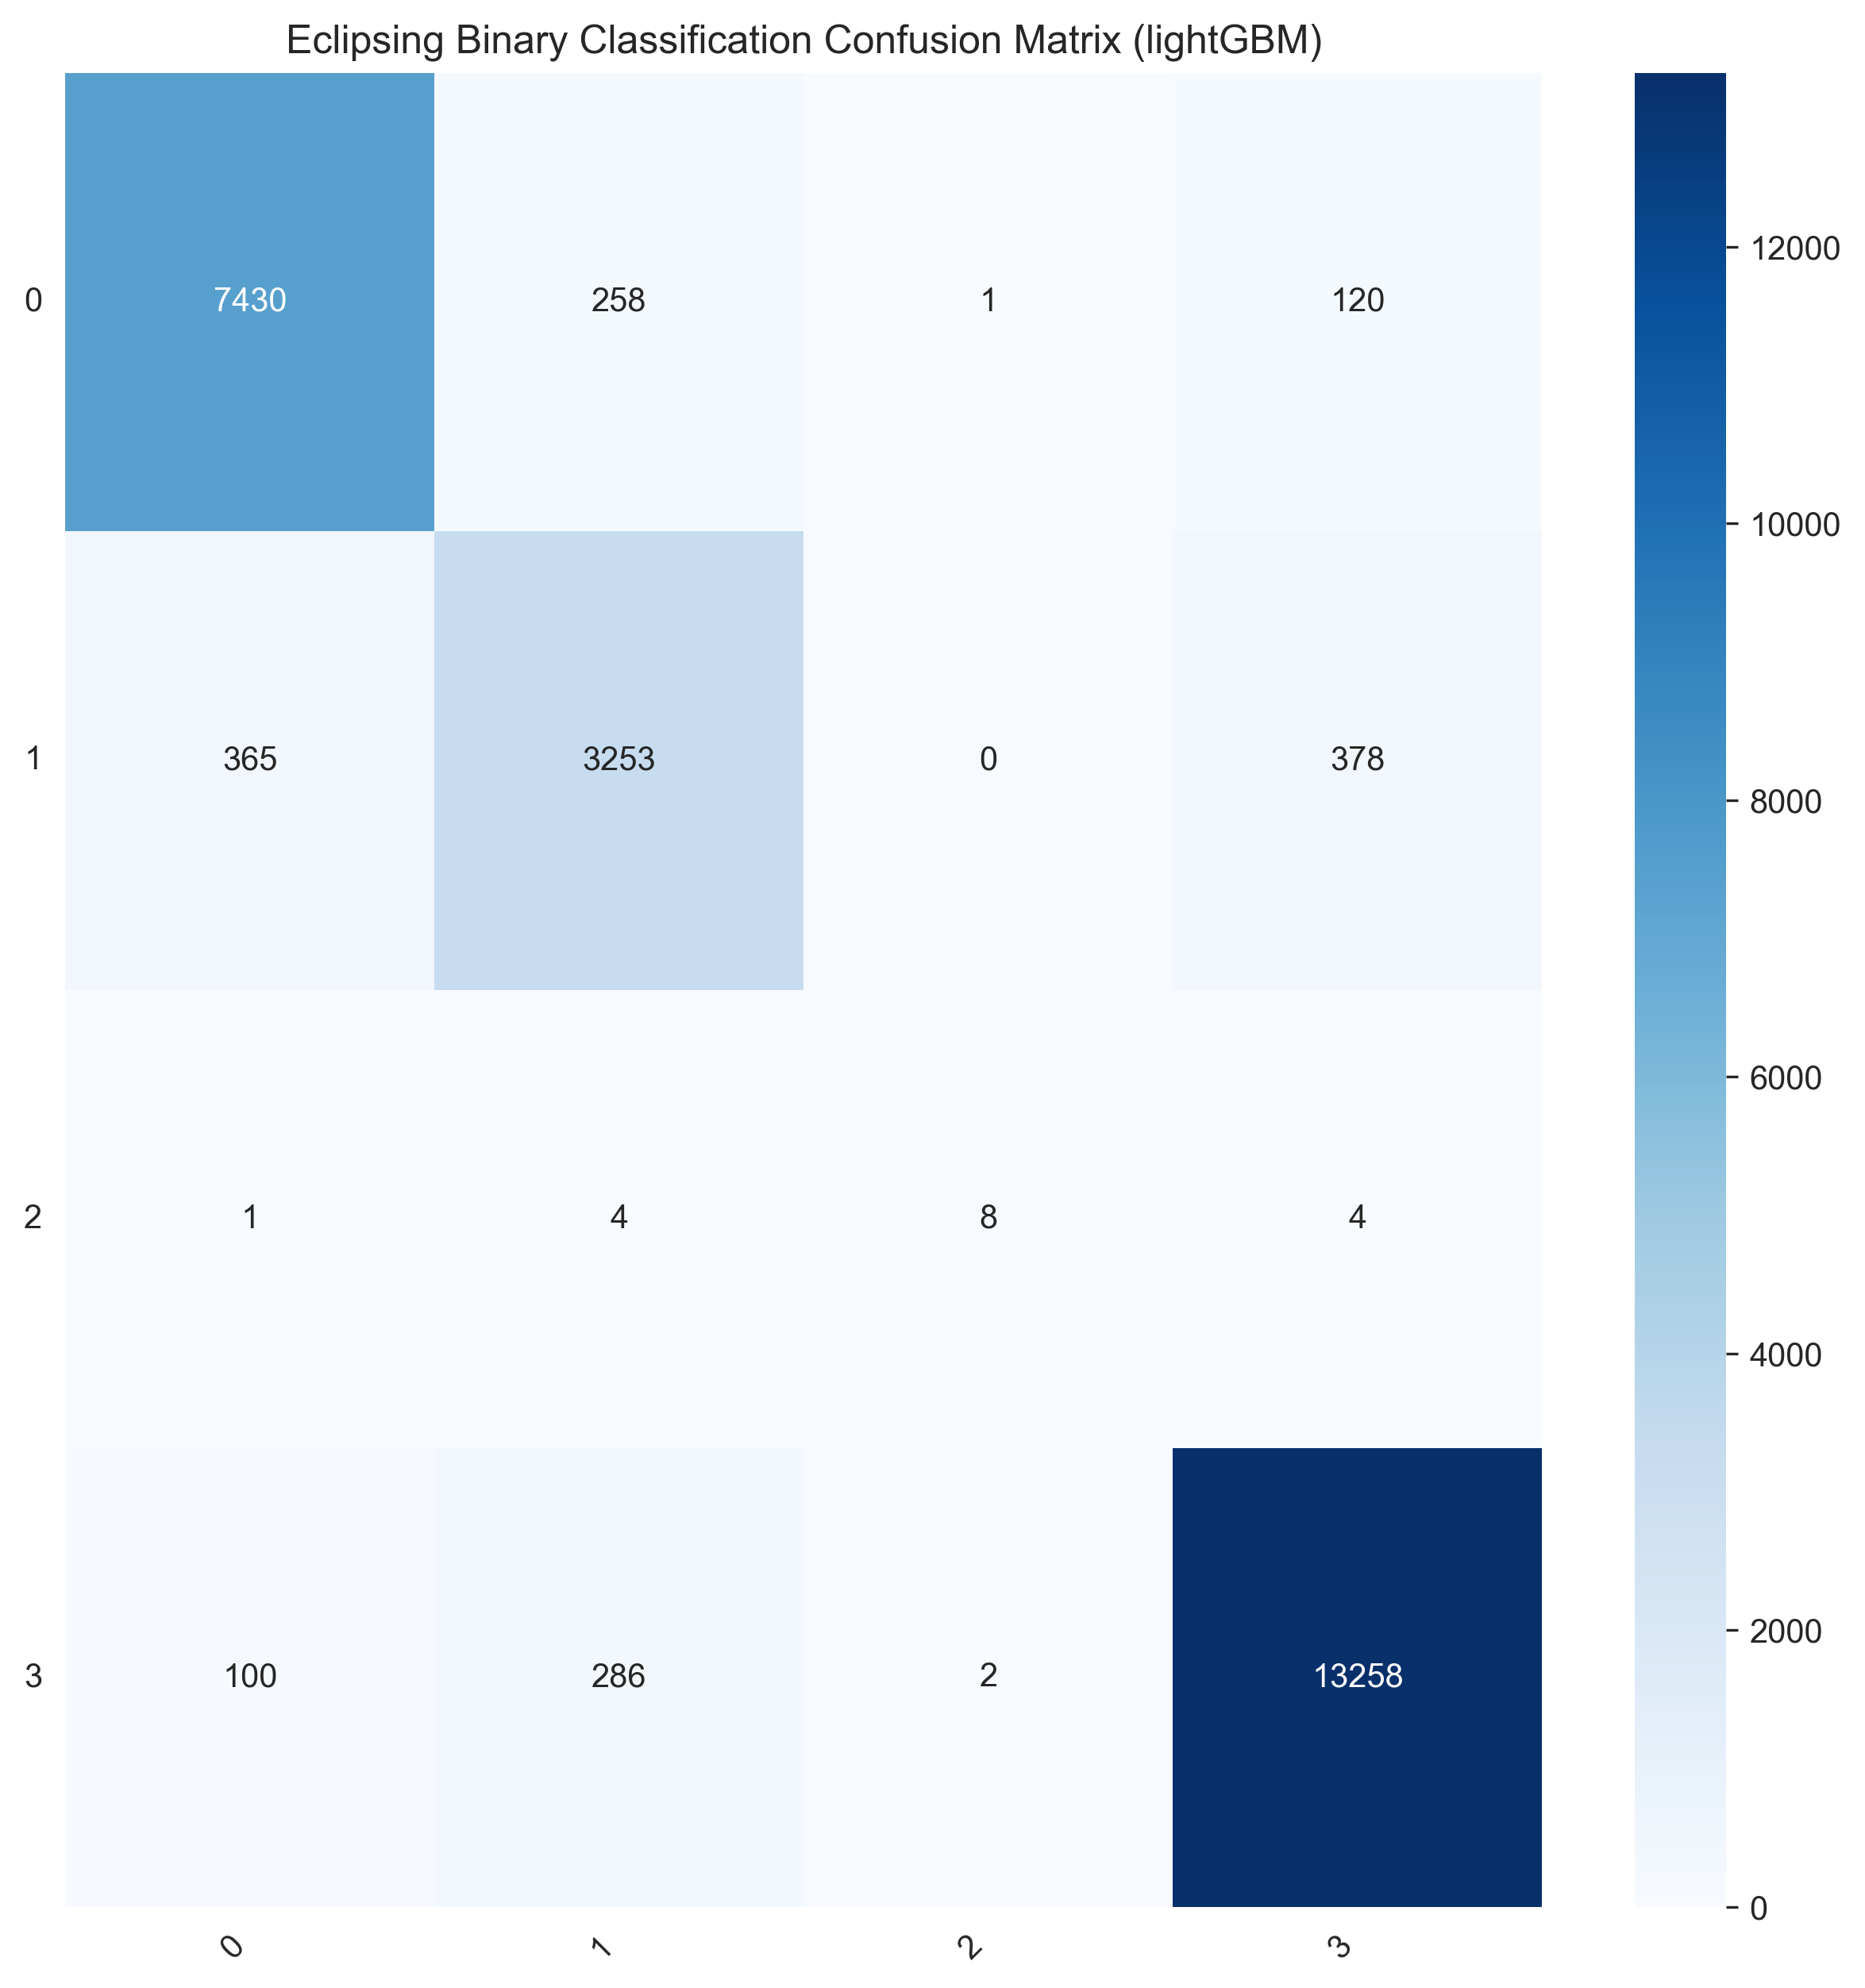

In [379]:
# from my_util.utils import plot_confusion_matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = grid_search.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

classes = np.unique(np.concatenate([np.array(y_test), np.array(y_pred)]))
classes = label_encoder.inverse_transform(classes)
plt.figure(figsize=(10, 10), dpi=300)

heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues)
heatmap.yaxis.set_ticklabels(classes, rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(classes, rotation=45, ha='right')
# plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Eclipsing Binary Classification Confusion Matrix (lightGBM)')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

In [381]:
from sklearn.metrics import recall_score, precision_score, f1_score, classification_report

# print(recall_score(y_test, y_pred, average='macro'))
# print(f1_score(y_test, y_pred, average='macro'))
# print(precision_score(y_test, y_pred, average='macro'))
# print(recall_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred, target_names=["EA", "EB", "ELL", "EW"], digits=4))

              precision    recall  f1-score   support

          EA     0.9410    0.9515    0.9462      7809
          EB     0.8558    0.8141    0.8344      3996
         ELL     0.7273    0.4706    0.5714        17
          EW     0.9635    0.9716    0.9675     13646

    accuracy                         0.9404     25468
   macro avg     0.8719    0.8019    0.8299     25468
weighted avg     0.9396    0.9404    0.9398     25468



In [359]:
# save model
import pickle

if not os.path.exists("../output/models/eclipsing_binary"):
    os.makedirs("../output/models/eclipsing_binary")

with open(f"../output/models/eclipsing_binary/lgbm_eclipsing_binary_top{fnum}_sm{smote}.pkl", "wb") as f:
    pickle.dump(grid_search.best_estimator_, f)